# 12 Steps to Navier stokes - Julia

## Step 1: 1-D Linear Convection
----




The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Now let's try implementing this in Python.  

We'll start by importing a few libraries to help us out.

* `numpy` is a library that provides a bunch of useful matrix operations akin to MATLAB
* `matplotlib` is a 2D plotting library that we will use to plot our results
* `time` and `sys` provide basic timing functions that we'll use to slow down animations for viewing

In [37]:
using Plots

In [38]:
nx = 41;  # try changing this number from 41 to 81 and Run All ... what happens?
Δx = 2 / (nx-1);
nt = 25;    #nt is the number of timesteps we want to calculate
Δt = 0.025;  #dt is the amount of time each timestep covers (delta t)
c = 1;      #assume wavespeed of c = 1
x = 0:Δx:2;

In [39]:
u = ones(nx);
u[convert(Int8,0.5/Δx):convert(Int8,1/Δx)+1] .= 2;

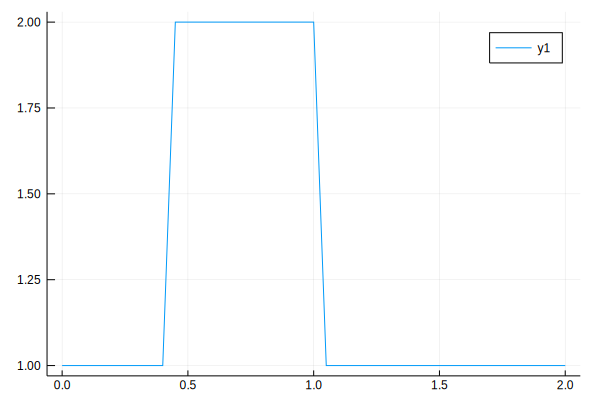

In [40]:
plot(x,u)

In [41]:
for n in 1:nt+1
    un = deepcopy(u)
    for i in 2:nx
     u[i] = un[i] - c * Δt / Δx * (un[i] - un[i-1])
    end
end  

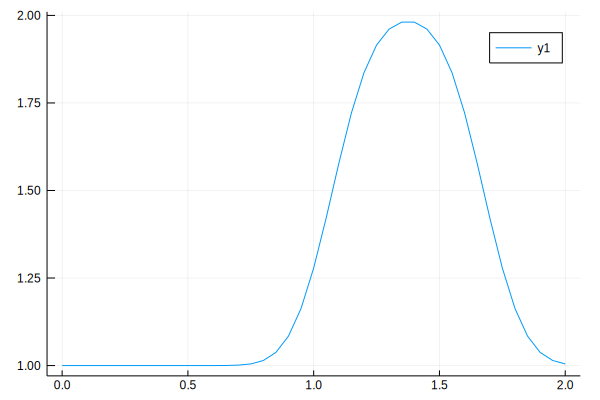

In [42]:
plot(x,u)

##  Step 2: Nonlinear convection

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

In [43]:
nx = 41;
Δx = 2 / (nx - 1);
nt = 20;    #nt is the number of timesteps we want to calculate
Δt = .025;  #dt is the amount of time each timestep covers (delta t)

u = ones(nx);      #as before, we initialize u with every value equal to 1.
u[convert(Int8,0.5/Δx):convert(Int8,1 / Δx + 1)] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = ones(nx); #initialize our placeholder array un, to hold the time-stepped solution

In [44]:
for n in 1:nt+1
    un = deepcopy(u)
    for i in 2:nx
     u[i] = un[i] - un[i] * Δt / Δx * (un[i] - un[i-1])
    end
end  

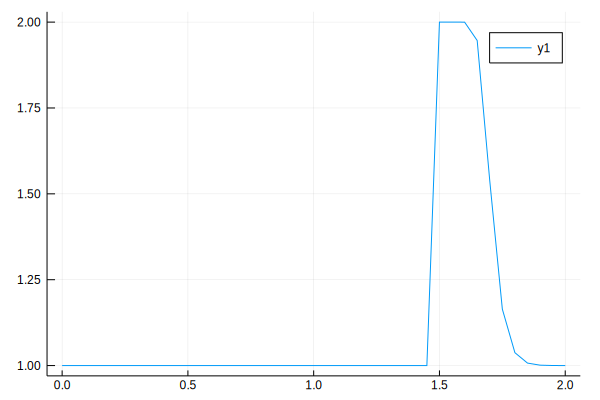

In [45]:
plot(x,u)

## Step 3: Diffusion Equation in 1-D

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial ^2 u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.  If we neglect any terms of $O(\Delta x^4)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.  

$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Then rearrange to solve for $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ and the result is:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


We can now write the discretized version of the diffusion equation in 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $u_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else. We are ready to number-crunch!

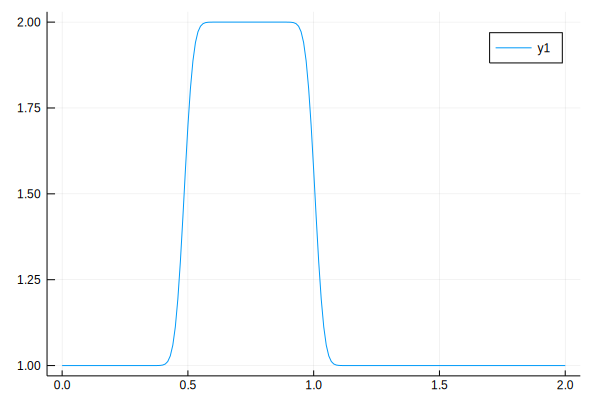

In [46]:
nx = 201;
Δx = 2 / (nx - 1);
x = 0:Δx:2;
nt = 20;   #the number of timesteps we want to calculate
nu = 0.3;   #the value of viscosity
sigma = .2; #sigma is a parameter, we'll learn more about it later
Δt = sigma * Δx^2 / nu; #dt is defined using sigma ... more later!

u = ones(nx);      #as before, we initialize u with every value equal to 1.
u[convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1 / Δx + 1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = ones(nx); #initialize our placeholder array un, to hold the time-stepped solution

for n in 1:nt+1
    un = deepcopy(u)
    for i in 2:nx-1
     u[i] = un[i] + nu * Δt / Δx^2 * (un[i+1] - 2*un[i] + un[i-1])
    end
end  

plot(x,u)

In julia the same can be achieved using method of lines, *DifferentialEquations.jl* and *DiffEqOperators.jl*

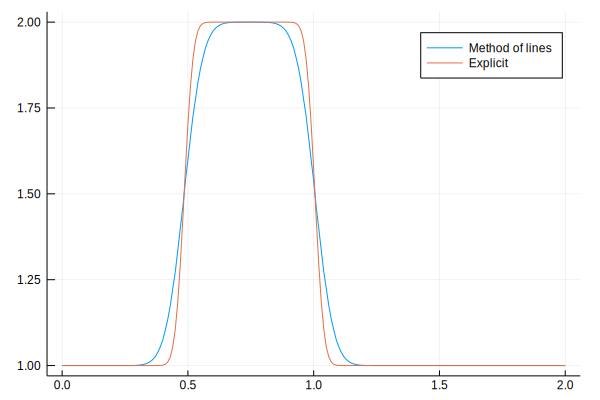

In [49]:
using DiffEqOperators, Plots; import DifferentialEquations
u2 = ones(nx);      #as before, we initialize u with every value equal to 1.
u2[convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1 / Δx + 1))] .= 2.0;  #then set u = 2 between 0.5 and 1 as p
u0 = deepcopy(u);
A = DerivativeOperator{Float64}(2,2,Δx,nx,:Neumann,:Neumann;BC=(0.,0.));
A_array = convert(Array,A);

f2(u2,p,t) = A_array*u2;

prob1 = ODEProblem(f2,u0,(0.0,Δt*nt));
sol1 = DifferentialEquations.solve(prob1);
plot(x,[sol1[end],un],label=["Method of lines","Explicit"])

## Step 4: Burgers' Equation

You can read about Burgers' Equation on its [wikipedia page](http://en.wikipedia.org/wiki/Burgers'_equation).

Burgers' equation in one spatial dimension looks like this:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

As you can see, it is a combination of non-linear convection and diffusion. It is surprising how much you learn from this neat little equation! 

We can discretize it using the methods we've already detailed in Steps [1](./01_Step_1.ipynb) to [3](./04_Step_3.ipynb).  Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

As before, once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

### Initial and Boundary Conditions

To examine some interesting properties of Burgers' equation, it is helpful to use different initial and boundary conditions than we've been using for previous steps.  

Our initial condition for this problem is going to be:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

This has an analytical solution, given by:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Our boundary condition will be:

$$u(0) = u(2\pi)$$

This is called a *periodic* boundary condition. Pay attention! This will cause you a bit of headache if you don't tread carefully.

### Saving Time with SymPy


The initial condition we're using for Burgers' Equation can be a bit of a pain to evaluate by hand.  The derivative $\frac{\partial \phi}{\partial x}$ isn't too terribly difficult, but it would be easy to drop a sign or forget a factor of $x$ somewhere, so we're going to use SymPy to help us out.  

[SymPy](http://sympy.org/en/) is the symbolic math library for Python.  It has a lot of the same symbolic math functionality as Mathematica with the added benefit that we can easily translate its results back into our Python calculations (it is also free and open source). 

One strength of julia is how well it plays with others. This is leveraged in the SymPy package for julia to provide a symbolic math interface through a connection to Python and its SymPy package via julia's PyCall package. We see in this project how this additional functionality affords an alternative approach to performing calculus problems.

The SymPy package for julia is an add on, it is loaded into a session with the command

In [63]:
using SymPy, Plots

The julia sympy provides an easy macro *'@vars'* to simplify variable creation

In [64]:
@vars x nu t;

Now let's derive this monster of an equation... 

In [65]:
ϕ = (exp(-(x - 4 * t)^2 / (4 * nu * (t + 1))) +
       exp(-(x - 4 * t - 2 * pi)^2 / (4 * nu * (t + 1))));
ϕ_prime = ϕ.diff(x);
u = -2 *nu*(ϕ_prime / ϕ)+4;

### Now what?


Now that we have the Pythonic version of our derivative, we can finish writing out the full initial condition equation and then translate it into a usable Python expression.  For this, we'll use the *lambdify* function, which takes a SymPy symbolic equation and turns it into a callable function.  

To lambdify this expression into a useable function, we tell lambdify which variables to request and the function we want to plug them in to.

In [66]:
ufunc = lambdify(u,[t, x, nu])
print(ufunc(1, 4, 3))

3.49170664206445

### Back to Burgers' Equation

Now that we have the initial conditions set up, we can proceed and finish setting up the problem.  We can generate the plot of the initial condition using our lambdify-ed function.

In [67]:
###variable declarations
nx = 101
nt = 100
Δx = 2 * pi / (nx - 1)
nu = 0.07
Δt = Δx * nu

x = collect(range(0, stop=2*pi, length = nx))
#un = numpy.empty(nx)
t = 0;

u = [ufunc(t, x0, nu) for x0 in x];
u

101-element Array{Float64,1}:
 4.0               
 4.0628318530717955
 4.125663706143592 
 4.188495559215387 
 4.251327412287184 
 4.314159265358979 
 4.376991118430775 
 4.439822971502571 
 4.502654824574367 
 4.565486677646163 
 4.628318530717959 
 4.691150383789754 
 4.7539822368615505
 ⋮                 
 3.308849616210246 
 3.3716814692820414
 3.434513322353837 
 3.4973451754256333
 3.560177028497429 
 3.623008881569225 
 3.6858407346410207
 3.748672587712816 
 3.8115044407846126
 3.874336293856408 
 3.9371681469282045
 4.0               

┌ Warning: Skipped marker arg o.
└ @ Plots /home/bram/.julia/packages/Plots/gylTh/src/args.jl:744


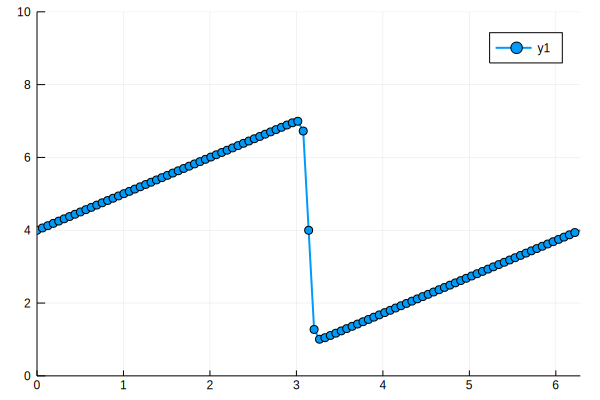

In [68]:
plot(x,u,marker='o',linewidth=2,xlims=(0,2*pi),ylims=(0,10))

This is definitely not the hat function we've been dealing with until now. We call it a "saw-tooth function".  Let's proceed forward and see what happens.  

### Periodic Boundary Conditions

One of the big differences between Step 4 and the previous lessons is the use of *periodic* boundary conditions.  If you experiment with Steps 1 and 2 and make the simulation run longer (by increasing `nt`) you will notice that the wave will keep moving to the right until it no longer even shows up in the plot.  

With periodic boundary conditions, when a point gets to the right-hand side of the frame, it *wraps around* back to the front of the frame.  

Recall the discretization that we worked out at the beginning of this notebook:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

What does $u_{i+1}^n$ *mean* when $i$ is already at the end of the frame?

Think about this for a minute before proceeding.  



In [69]:
for n in 1:nt+1
    un = deepcopy(u)
    for i in 2:nx-1      
        u[i] = un[i] - un[i] * Δt / Δx *(un[i] - un[i-1]) + nu * Δt / Δx^2 *
            (un[i+1] - 2 * un[i] + un[i-1])
        u[1] = un[1] - un[1] * Δt / Δx * (un[1] - un[end-2]) + nu * Δt / Δx^2 *
        (un[2] - 2 * un[1] + un[end-1])
        u[end] = u[1] 
    end
end        
        
u_analytical = [ufunc(nt * Δt, xi, nu) for xi in x]

101-element Array{Float64,1}:
 2.7781193099216064
 2.821757905995835 
 2.8653965020700634
 2.909035098144291 
 2.95267369421852  
 2.9963122902927486
 3.0399508863669764
 3.0835894824412047
 3.1272280785154334
 3.1708666745896616
 3.21450527066389  
 3.258143866738118 
 3.3017824628123464
 ⋮                 
 2.2980947550267197
 2.341733349450408 
 2.3853719452917934
 2.4290105413331746
 2.472649137402769 
 2.516287733476344 
 2.5599263295504797
 2.6035649256246947
 2.6472035216989216
 2.6908421177731494
 2.734480713847378 
 2.7781193099216064

┌ Warning: Skipped marker arg o.
└ @ Plots /home/bram/.julia/packages/Plots/gylTh/src/args.jl:744


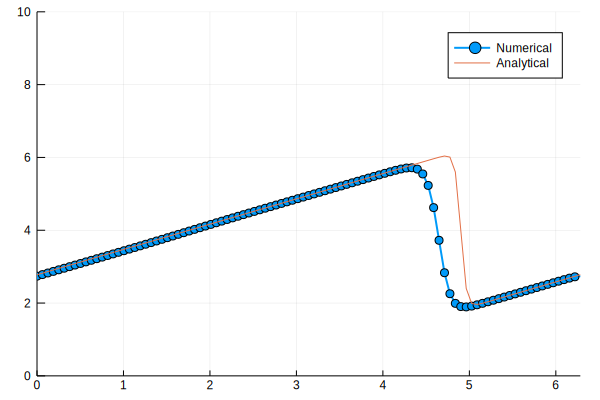

In [77]:
plot(x,un,marker='o',linewidth=2,xlims=(0,2*pi),ylims=(0,10),label="Numerical")
plot!(x,u_analytical,label="Analytical")

***

What next?
----

The subsequent steps, from 5 to 12, will be in two dimensions. But it is easy to extend the 1D finite-difference formulas to the partial derivatives in 2D or 3D. Just apply the definition — a partial derivative with respect to $x$ is the variation in the $x$ direction *while keeping $y$ constant*.

Before moving on to [Step 5](), make sure you have completed your own code for steps 1 through 4 and you have experimented with the parameters and thought about what is happening. 

## Intermezzo: Array operations

For more computationally intensive programs, the use of matrix multiplication through julia's arrays can provide an increase in execution speed many-times over.  As a simple example, consider the following equation:

$$u^{n+1}_i = u^n_i-u^n_{i-1}$$

Now, given a vector $u^n = [0, 1, 2, 3, 4, 5]\ \ $   we can calculate the values of $u^{n+1}$ by iterating over the values of $u^n$ with a for loop.  

In [28]:
u = collect(0:1:5);
for i in 2:length(u)
    println(u[i]-u[i-1])
end

1
1
1
1
1


This is the expected result and the execution time was nearly instantaneous.  If we perform the same operation as an array operation, then rather than calculate $u^n_i-u^n_{i-1}\ $ 5 separate times, we can slice the $u$ array and calculate each operation with one command:

In [29]:
u[2:end] - u[1:end-1]

5-element Array{Int64,1}:
 1
 1
 1
 1
 1

What this command says is subtract the 0th, 1st, 2nd, 3rd, 4th and 5th elements of $u$ from the 1st, 2nd, 3rd, 4th, 5th and 6th elements of $u$.  

### Speed Increases

For a 6 element array, the benefits of array operations are pretty slim.  There will be no appreciable difference in execution time because there are so few operations taking place.  But if we revisit 2D linear convection, we can see some substantial speed increases.  


In [5]:
nx = 81;
ny = 81;
nt = 100;
c = 1;
Δx = 2 / (nx - 1);
Δy = 2 / (ny - 1);
sigma = .2;
Δt = sigma * Δx;

x=collect(range(0, stop=2, length = nx))
y=collect(range(0, stop=2, length = ny))

u = ones(ny,nx);      ##create a 1xn vector of 1's
un = deepcopy(u);

u[convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1 / Δx + 1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

With our initial conditions all set up, let's first try running our original nested loop code, making use of the ```@time``` macro, which will help us evaluate the performance of our code. 

The execution times below will vary from machine to machine.  Don't expect your times to match these times, but you _should_ expect to see the same general trend in decreasing execution time as we switch to array operations.

In [31]:
u = ones(ny,nx);      ##create a 1xn vector of 1's
un = deepcopy(u);

u[convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1 / Δx + 1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

@time begin
    for n in 1:nt+1##loop across number of time steps
        un = deepcopy(u)
        for j in 2:ny
            for i in 2:nx
                u[j, i] = (un[j, i] - (c * Δt / Δx * 
                                      (un[j, i] - un[j, i - 1])) - 
                                      (c * Δt / Δy * 
                                       (un[j, i] - un[j - 1, i]));)
                u[1, :] .= 1;
                u[end, :] .= 1;
                u[:, 1] .= 1;
                u[:, end] .= 1;
            end
        end
    end
end

  3.183346 seconds (23.29 M allocations: 449.457 MiB, 1.00% gc time)


With the triple for-loop code above, the execution time achieved was 3.18 seconds.  Keep in mind that with these three nested loops, that the statements inside the **j** loop are being evaluated more than 650,000 times.  Let's compare that with the performance of the same code implemented with array operations:

In [32]:
u = ones(ny,nx);      ##create a 1xn vector of 1's
un = deepcopy(u);

u[convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1 / Δx + 1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

@time begin
    for n in 1:nt+1##loop across number of time steps
        un = deepcopy(u)
        u[2:end, 2:end] = (un[2:end, 2:end] - (c * Δt / Δx * 
                (un[2:end, 2:end] - un[2:end, 1:end-1])) - 
                      (c * Δt / Δy * 
                (un[2:end, 2:end] - un[1:end-1, 2:end]));)
        u[1, :] .= 1;
        u[end, :] .= 1;
        u[:, 1] .= 1;
        u[:, end] .= 1;
    end
end

  0.012692 seconds (6.36 k allocations: 59.533 MiB, 16.27% gc time)


As you can see, the speed increase is substantial.  The same calculation goes from 3 seconds to 0.012 seconds.  3 seconds isn't a huge amount of time to wait, but these speed gains will increase exponentially with the size and complexity of the problem being evaluated.  

## Step 5: 2-D Linear Convection

Up to now, all of our work has been in one spatial dimension (Steps [1](./01_Step_1.ipynb) to [4](./05_Step_4.ipynb)). We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12. Let's get started!

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.  

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.  

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

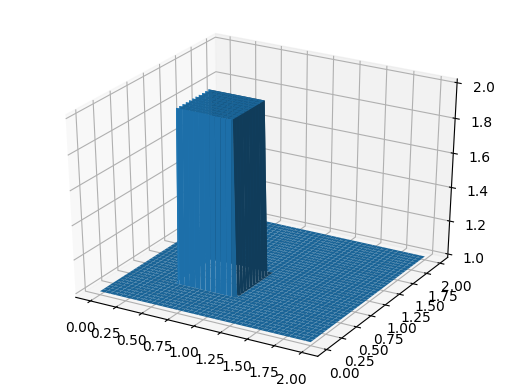

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f18f6c48c18>

In [7]:
using PyPlot

nx = 81
ny = 81
nt = 100
c = 1
Δx = 2 / (nx - 1)
Δy = 2 / (ny - 1)
sigma = .2
Δt = sigma * Δx

x=collect(range(0, stop=2, length = nx))
y=collect(range(0, stop=2, length = ny))

u = ones(ny,nx);      ##create a 1xn vector of 1's
un = deepcopy(u);

u[convert(Int8,floor(0.5/Δy)):convert(Int8,floor(1/Δy+1)),
    convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1/Δy+1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s
###Plot Initial Condition
##the figsize parameter can be used to produce different sized images

surf(x,y,u)

### Iterating in two dimensions

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 

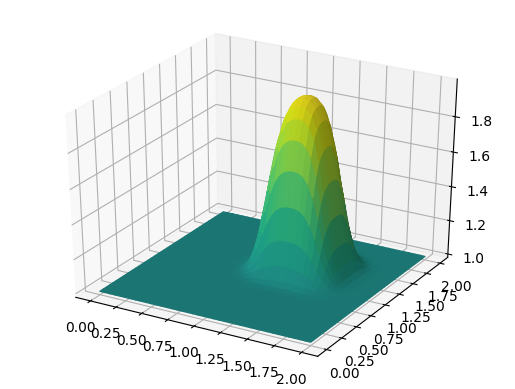

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f18f25601d0>

In [11]:
u = ones(ny,nx);      ##create a 1xn vector of 1's
u[convert(Int8,floor(0.5/Δy)):convert(Int8,floor(1/Δy+1)),
    convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1/Δy+1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

for n in 1:nt+1##loop across number of time steps
    un = deepcopy(u)
    for j in 2:ny
        for i in 2:nx
            u[j, i] = (un[j, i] - (c * Δt / Δx * 
                                  (un[j, i] - un[j, i - 1])) - 
                                  (c * Δt / Δy * 
                                   (un[j, i] - un[j - 1, i]));)
            u[1, :] .= 1;
            u[end, :] .= 1;
            u[:, 1] .= 1;
            u[:, end] .= 1;
        end
    end
end

surf(x,y,u,facecolors=get_cmap("viridis")(u/maximum(u)))

### Array Operations
Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.  

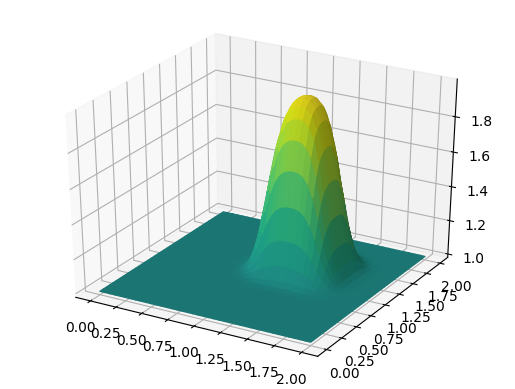

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f18f1d875f8>

In [14]:
u = ones(ny,nx);      ##create a 1xn vector of 1's
u[convert(Int8,floor(0.5/Δy)):convert(Int8,floor(1/Δy+1)),
    convert(Int8,floor(0.5/Δx)):convert(Int8,floor(1/Δy+1))] .= 2;  #then set u = 2 between 0.5 and 1 as per our I.C.s

for n in 1:nt+1##loop across number of time steps
    un = deepcopy(u)
    u[2:end, 2:end] = (un[2:end, 2:end] - (c * Δt / Δx * 
            (un[2:end, 2:end] - un[2:end, 1:end-1])) - 
                  (c * Δt / Δy * 
            (un[2:end, 2:end] - un[1:end-1, 2:end]));)
    u[1, :] .= 1;
    u[end, :] .= 1;
    u[:, 1] .= 1;
    u[:, end] .= 1;
end

surf(x,y,u,facecolors=get_cmap("viridis")(u/maximum(u)))